In [1]:
# !jupyter nbextension enable --py gmaps

In [2]:
import coffee
from coffee.config import conf
import gmaps
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
conf.configure_env("Prod", "./data")
conf.import_keys()
gmaps.configure(api_key=conf.google.maps_api_key)


In [20]:
# configure google docs access
client = conf.google.get_client()
coffee_doc = client.open_by_key(conf.runtime.coffee_doc_id)

roasts = coffee.util.read_tab_as_df(coffee_doc, 'Roasting Method', col_types={'Batch': int}, index_col=['Batch'], date_cols=['Roasted on'], num_columns=19)
roasts


,Coffee bean,SKU,Roasted on,Quantity (grams),Temperature,Quantity Out (g),Quantity Out (Percentage),Program,"Time, Program (min)",Deviation (time delta to program),Cooldown Program,"Time, Cooldown",Temp A @ Cooldown (F),Temp B @ Cooldown (F),Color,Total Time (s),Roasting notes,Tasting notes
Batch,,,,,,,,,,,,,,,,,,
1,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-09,114.1,67F,96.5,0.85,P2,8.5,42.0,"Manual P2, Fast Drum",90.0,NaN,NaN,8.0,642.0,Much chaff in the cracks,NaN
2,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-15,114.2,67F,96.7,0.85,P2,8.5,27.0,"Manual P2, Fast Drum",90.0,NaN,NaN,8.0,627.0,Much chaff in the cracks,NaN
3,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-23,114.2,67F,97.4,0.85,P2,8.5,59.0,"Manual P1, Slow Drum",90.0,NaN,NaN,11.0,659.0,Some chaff in the cracks,"Light flavor less grassy, more full back taste"
4,Ethiopia Agaro Kedamai Cooperative,GCX-5770-005,2018-12-24,228.5,67F,193.7,0.85,P2,12.0,83.0,"Manual P1, Slow Drum",130.0,NaN,NaN,11.0,933.0,Some chaff in the cracks,NaN
5,Sweet Maria's Altiplano Blend,FirstOrder-1,2018-12-01,114.1,67F,97.5,0.85,P2,8.5,27.0,"Manual P2, Fast Drum",90.0,NaN,NaN,NaN,627.0,NaN,NaN
6,Sweet Maria's Altiplano Blend,FirstOrder-1,2018-12-04,114.0,67F,95.6,0.84,P2,8.5,29.0,Auto,90.0,NaN,NaN,NaN,629.0,NaN,A bit burned
7,Sweet Maria's Altiplano Blend,FirstOrder-1,2018-12-08,251.9,67F,216.4,0.86,P2,12.0,57.0,"Manual P2, Fast Drum",130.0,NaN,NaN,NaN,907.0,NaN,NaN
8,Ethiopia Debub Merab SWP Decaf,GCX-5734,2018-11-22,114.1,67F,98.3,0.86,P2,8.5,-1.0,"Manual P2, Fast Drum",90.0,NaN,NaN,NaN,599.0,NaN,Sweet but a little hollow
9,Ethiopia Debub Merab SWP Decaf,GCX-5734,2018-11-23,115.1,67F,100.0,0.87,P2,8.5,5.0,"Manual P1, Fast Drum",90.0,NaN,NaN,NaN,605.0,NaN,NaN


In [21]:
outws = coffee.util.read_tab_as_df(coffee_doc, 'geo results')
outws

bought_coffees = outws[['source', 'latitude', 'longitude', 'elevation_m']]
roasted_coffee = roasts[['Coffee bean', 'Roasted on', 'Quantity (grams)']]
roasted_coffee = roasted_coffee.groupby('Coffee bean').sum()
combined = pd.merge(roasted_coffee, bought_coffees, left_on='Coffee bean', right_on='source')


In [22]:
fig = gmaps.figure(map_type='TERRAIN')
hml = gmaps.heatmap_layer(combined[['latitude', 'longitude']], weights=combined['Quantity (grams)'])
hml.gradient = [
    'white',
    (64, 0, 0, 0.7),
    (200, 0, 0, 0.9)
]

fig.add_layer(hml)
# fig.add_layer()
fig


Figure(layout=FigureLayout(height='420px'))

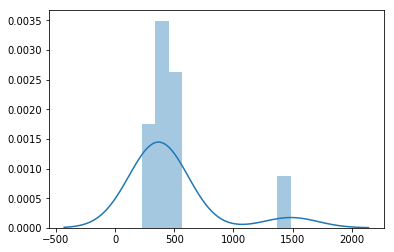

In [23]:
g = sns.distplot(roasted_coffee['Quantity (grams)'].values)


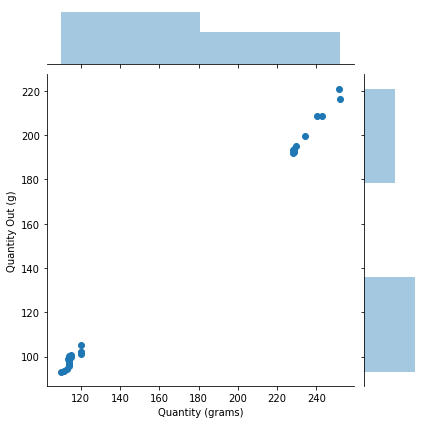

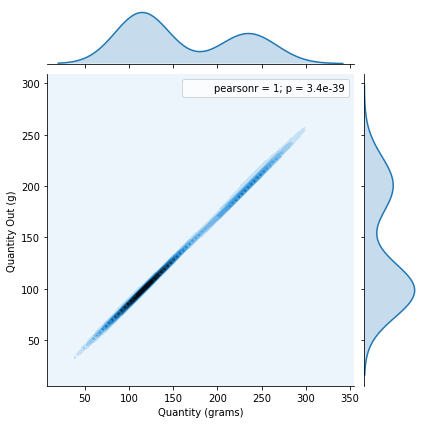

In [24]:
import scipy.stats as stats
roastings = roasts[['Quantity (grams)', 'Quantity Out (g)']]
sns.jointplot("Quantity (grams)", "Quantity Out (g)", data=roasts, kind='scatter')
plot_kde = sns.jointplot("Quantity (grams)", "Quantity Out (g)", data=roasts, kind='kde')
plot_kde.annotate(stats.pearsonr)
plt.show()

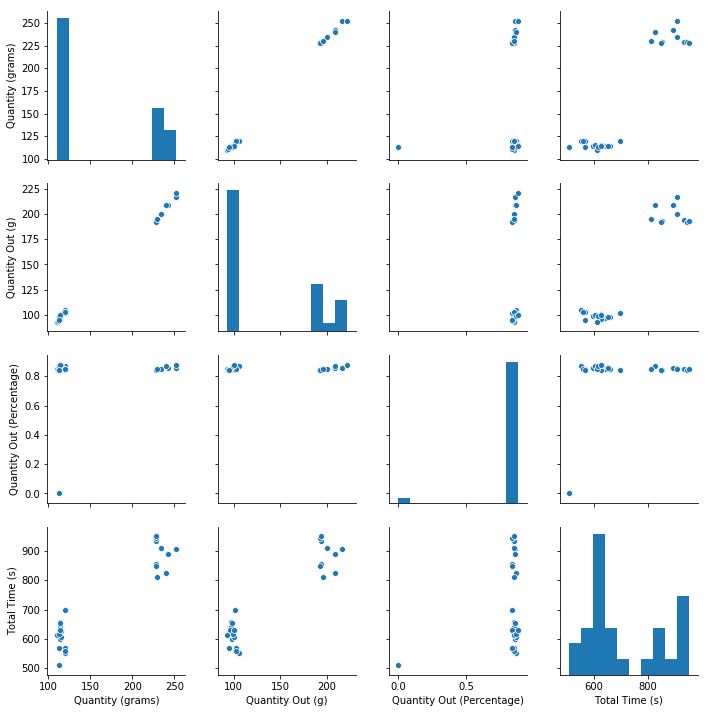

In [26]:
sns.pairplot(roasts[['Roasted on', 'Quantity (grams)', 'Quantity Out (g)', 'Quantity Out (Percentage)', 'Total Time (s)']])
